##Model 1 : Simple Linear Regression

[[-0.72313942]
 [ 0.14620852]
 [-0.60459198]
 [-0.09088638]
 [ 1.37119879]
 [ 0.81797738]
 [-1.35539247]
 [ 2.28006255]
 [-0.68362361]
 [-0.99975013]
 [ 0.46233504]
 [ 0.50185086]
 [-0.4070129 ]
 [-0.60459198]
 [ 1.68732532]
 [-1.07878176]
 [-1.4344241 ]
 [ 0.93652482]
 [ 0.06717689]
 [-0.28846545]] [[-1.27636084]
 [ 2.20103092]
 [-0.24894964]
 [-0.32798127]
 [ 1.88490439]
 [ 1.56877787]
 [ 1.92442021]
 [-0.28846545]
 [ 0.22524015]
 [ 1.25265135]] [ 56642  66029  64445  61111 113812  91738  46205 121872  60150  39891
  81363  93940  57189  54445 105582  43525  39343  98273  67938  56957] [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


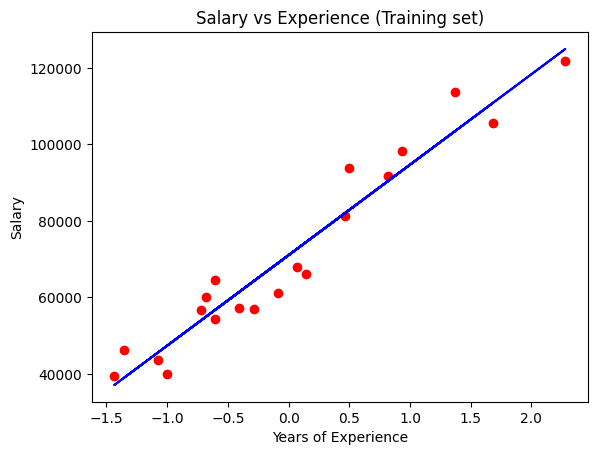

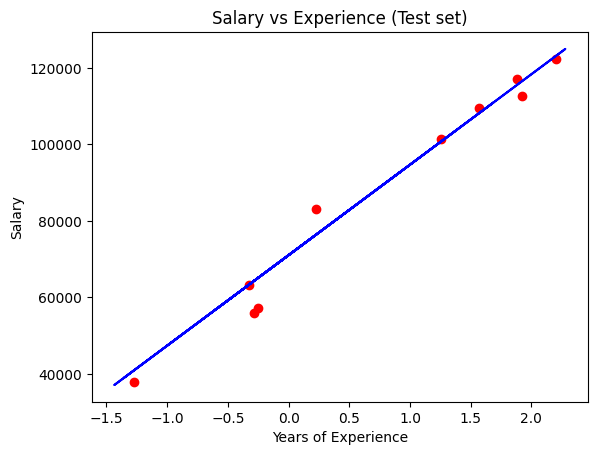

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset and getting the features and target variable

linear_regression_df=pd.read_csv("/content/Simple-Linear-Dataset.csv")
X=linear_regression_df.iloc[:,:-1].values
y=linear_regression_df.iloc[:,1].values

# print(linear_regression_df.shape)
# print(linear_regression_df.info())
# linear_regression_df.head()

#splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

# print(X_train.shape)
# print(X_test.shape)

#standardize feature
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

print(X_train,X_test,y_train,y_test)

#Training the model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

#predicting test set results

y_predict=model.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()







## Model 2 : Multiple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset and getting the features and target variable

multiple_regression_df=pd.read_csv('/content/Multiple-Linear-Dataset.csv')
X = multiple_regression_df.iloc[:, :-1].values
y = multiple_regression_df.iloc[:, 4].values


# Encoding categorical data which is Location column

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

# Using ColumnTransformer to apply OneHotEncoder to specific column(s)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],  # Apply OneHotEncoder to column 3
    remainder='passthrough'  # Keep other columns as they are
)
X = np.array(ct.fit_transform(X))

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

#splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

#predicting test set results

y_predict=model.predict(X_test)


# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0,1,2,3,4,5]]
X_opt_numeric=X_opt.astype(float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt_numeric).fit()
print("With all input features \n",regressor_OLS.summary())
X_opt = X[:, [0,1,3,4,5]]
X_opt_numeric=X_opt.astype(float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt_numeric).fit()
print("By removing one feature \n",regressor_OLS.summary())
X_opt = X[:, [0,3,4,5]]
X_opt_numeric=X_opt.astype(float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt_numeric).fit()
print("With constant and three product features\n",regressor_OLS.summary())
X_opt = X[:, [0,3,5]]
X_opt_numeric=X_opt.astype(float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt_numeric).fit()
print("With constant and Product_1 and Product_3 features as input\n",regressor_OLS.summary())
X_opt = X[:, [0,3]]
X_opt_numeric=X_opt.astype(float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt_numeric).fit()
print("With constant and Product_1 features as input\n",regressor_OLS.summary())




With all input features 
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.34e-27
Time:                        23:37:55   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   69

R^2 Score: 0.9474386447268489
Equation of the Model:
Profit = 46346.34 + 0.79 * Product_1 + 0.03 * Product_3


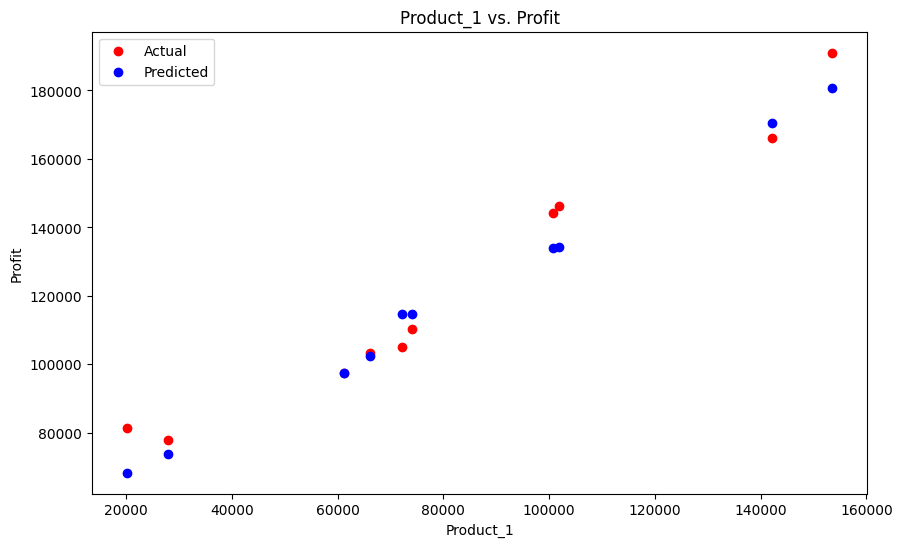

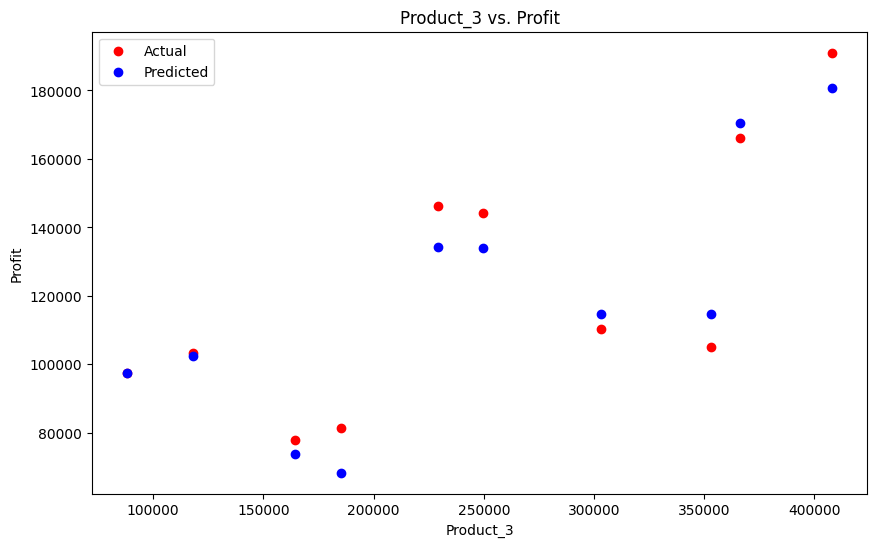

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset and getting the features and target variable
#features selected are Product_1 and Product_3 columns to predict Profit

multiple_linear_df=pd.read_csv("/content/Multiple-Linear-Dataset.csv")
X=multiple_linear_df.iloc[:,[0,2]].values
y=multiple_linear_df.iloc[:,-1].values

#splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#Training the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(X_train,y_train)

#predicting test set results

y_predict=model.predict(X_test)

# Evaluating the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
print("R^2 Score:", r2)

# Get the coefficients and intercept of the model
intercept = model.intercept_
coefficients = model.coef_

# Print the equation of the model
print("Equation of the Model:")
print(f"Profit = {intercept:.2f} + {coefficients[0]:.2f} * Product_1 + {coefficients[1]:.2f} * Product_3")

# Scatter plot for Product_1 vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual')
plt.scatter(X_test[:, 0], y_predict, color='blue', label='Predicted')
plt.title('Product_1 vs. Profit')
plt.xlabel('Product_1')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Scatter plot for Product_3 vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='red', label='Actual')
plt.scatter(X_test[:, 1], y_predict, color='blue', label='Predicted')
plt.title('Product_3 vs. Profit')
plt.xlabel('Product_3')
plt.ylabel('Profit')
plt.legend()
plt.show()




Model 3 : Polynomial Regression

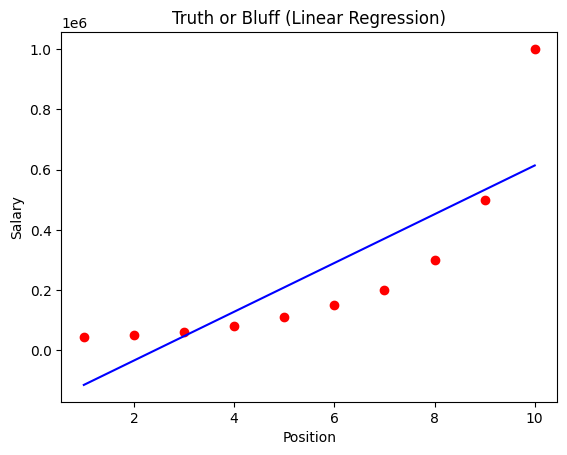

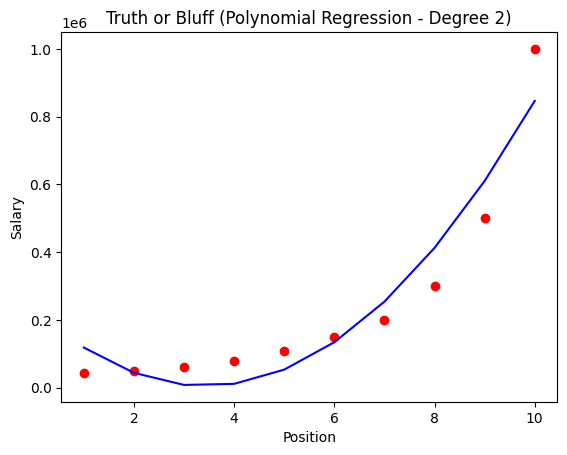

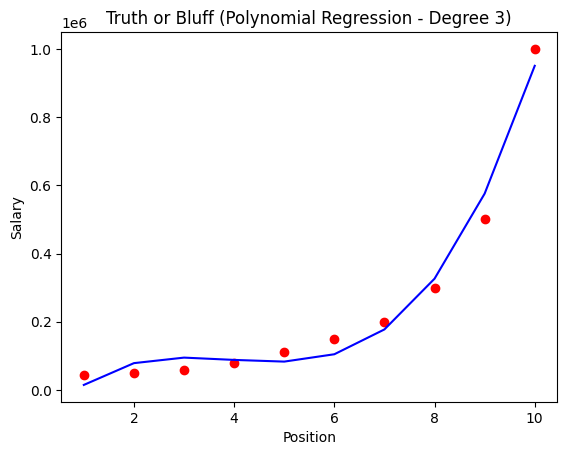

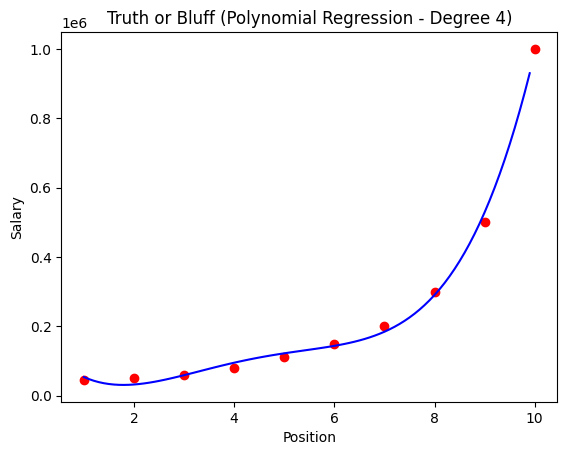

Predicted salary with Linear Regression: 330378.78787878784
Predicted salary with Polynomial Regression: 158862.45265155006


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

polynomial_regression_df=pd.read_csv('/content/Polynomial-Dataset.csv')
X = polynomial_regression_df.iloc[:, 1:2].values
y = polynomial_regression_df.iloc[:, 2].values

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results with degree=2
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression - Degree 2)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset with degree=3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)

# Visualising the Polynomial Regression results with degree=3
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_3.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression - Degree 3)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Fitting Polynomial Regression to the dataset with degree=4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly, y)

# Visualising the Polynomial Regression results with degree=4
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_4.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression - Degree 4)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression
new_position = 6.5
predicted_salary_linear = lin_reg.predict([[new_position]])
print("Predicted salary with Linear Regression:", predicted_salary_linear[0])

# Predicting a new result with Polynomial Regression
new_position_poly = poly_reg.fit_transform([[new_position]])
predicted_salary_poly = lin_reg_4.predict(new_position_poly)
print("Predicted salary with Polynomial Regression:", predicted_salary_poly[0])
